#### Downloading the imd data for rain and extracting the data as .xlsx

In [1]:
pip install imdlib


Note: you may need to restart the kernel to use updated packages.


### Importing relevant Libraries and download imd data

In [2]:
import pandas as pd
import imdlib as imd
import os
import matplotlib.pyplot as plt

In [14]:
start_yr = 1950
end_yr = 2023
variable = 'rain'
# Specify the directory where you want to download and store data (replace with your desired path)
download_dir = r'C:\Users\harsh\Desktop\Btech_project\Dataset'

# Create the directory if it doesn't exist
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

print(f"Directory created at: {download_dir}")


Directory created at: C:\Users\harsh\Desktop\Btech_project\Dataset


#### Downloading the dataset

In [4]:
# Download the data using the 'download_data' function first
imd.get_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=download_dir)

# Now, open the downloaded data
data = imd.open_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=download_dir)

Downloading: rain for year 1950
Downloading: rain for year 1951
Downloading: rain for year 1952
Downloading: rain for year 1953
Downloading: rain for year 1954
Downloading: rain for year 1955
Downloading: rain for year 1956
Downloading: rain for year 1957
Downloading: rain for year 1958
Downloading: rain for year 1959
Downloading: rain for year 1960
Downloading: rain for year 1961
Downloading: rain for year 1962
Downloading: rain for year 1963
Downloading: rain for year 1964
Downloading: rain for year 1965
Downloading: rain for year 1966
Downloading: rain for year 1967
Downloading: rain for year 1968
Downloading: rain for year 1969
Downloading: rain for year 1970
Downloading: rain for year 1971
Downloading: rain for year 1972
Downloading: rain for year 1973
Downloading: rain for year 1974
Downloading: rain for year 1975
Downloading: rain for year 1976
Downloading: rain for year 1977
Downloading: rain for year 1978
Downloading: rain for year 1979
Downloading: rain for year 1980
Download

In [15]:
# Open the downloaded data using the 'open_data' function
data = imd.open_data(variable, start_yr, end_yr, fn_format='yearwise', file_dir=download_dir)

# Convert the data to an xarray Dataset object for easier manipulation
ds = data.get_xarray()

print(ds)

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 27028, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 1kB 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * lon      (lon) float64 1kB 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
Data variables:
    rain     (time, lat, lon) float64 4GB -999.0 -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2024-10-21 19:39:30.697652 Python
    references:   
    comment:      
    crs:          epsg:4326


### Rainfall Dataset Overview

This dataset contains **gridded rainfall data** from **1950 to 2002** based on daily measurements across a specified region. It is sourced from the **India Meteorological Department (IMD)** and formatted according to **CF-1.7 conventions**.

#### Dataset Dimensions:
- **Time**: 19,358 daily records (from 1950-01-01 to 2002-12-31).
- **Latitude**: 129 grid points, ranging from approximately 6.5°N to 38.5°N.
- **Longitude**: 135 grid points, ranging from approximately 66.5°E to 100.0°E.

#### Data Variables:
- **Rain**: Gridded rainfall values (mm/day) for each time, latitude, and longitude point. Missing data is represented by the value **-999.0**.


#### Data Cleaning and Mean Rainfall plot

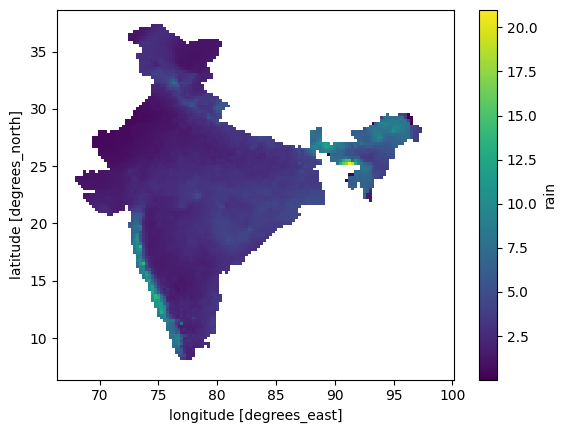

In [16]:
# Remove missing data (-999.0) by replacing it with NaN for easier handling
ds = ds.where(ds['rain'] !=-999)

# Calculate the mean rainfall over time for each latitude and longitude point
mean_rain = ds['rain'].mean('time')

mean_rain.plot()

> Highest Average rainfall in northeast India 

> Significant rainfall in western ghats as well

#### Data Parsing and Time series plot

FrozenMappingWarningOnValuesAccess({'time': 27028, 'lat': 129, 'lon': 135})


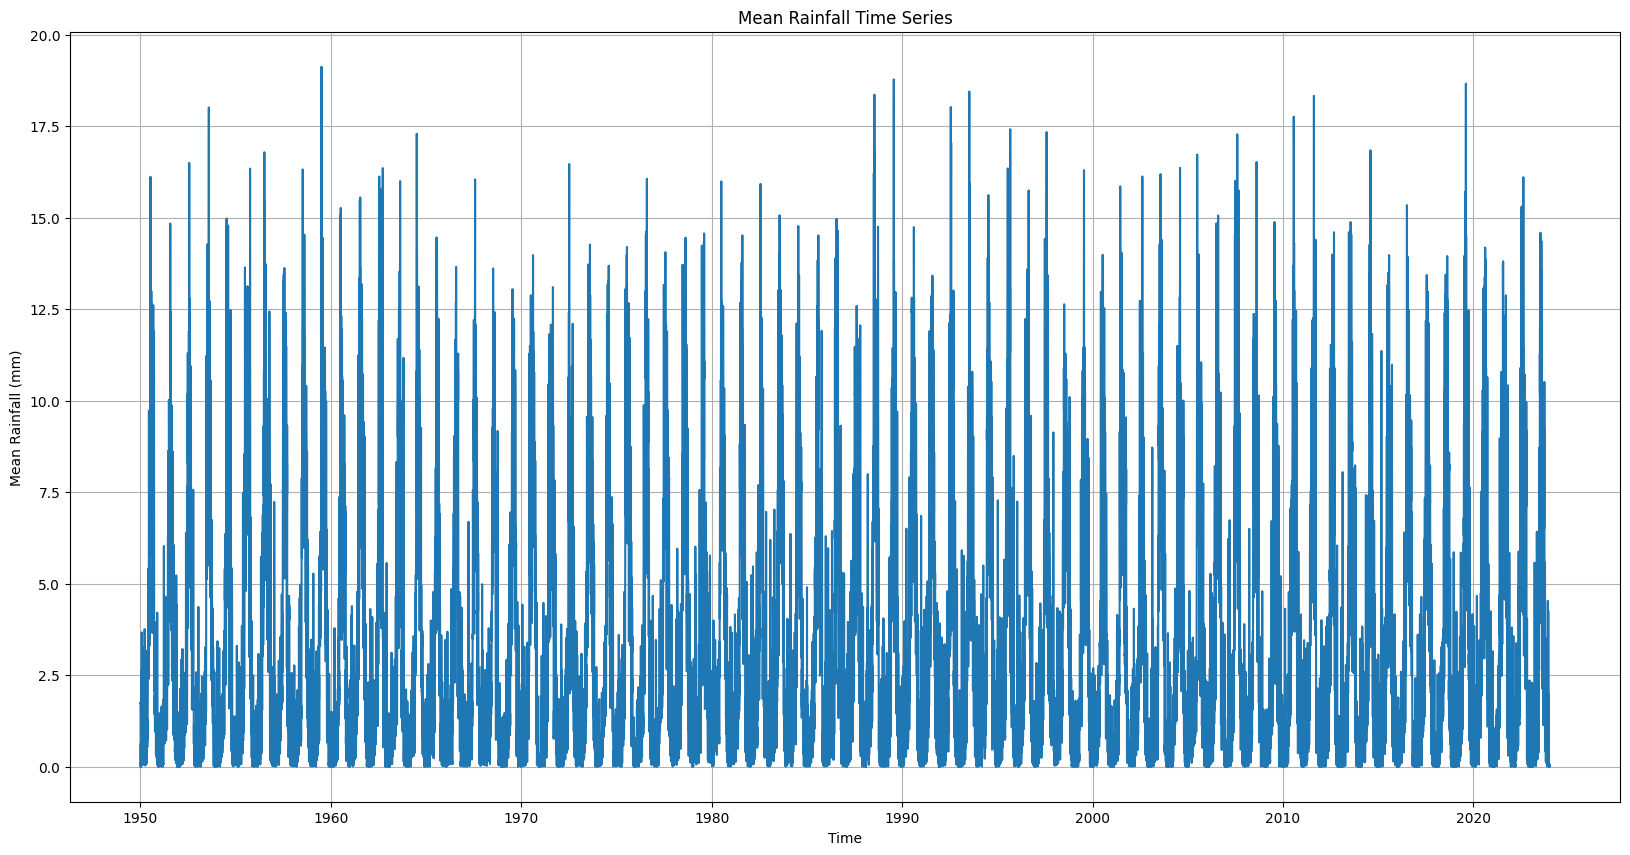

In [17]:
# lat = 22 to 25 and longitude = 80 to 84, covers the study area
# Check the correct names for latitude and longitude in your dataset
print(ds.dims)  # Print available dimensions

# Assuming the correct names are 'lat' and 'lon'
lat_range = slice(6.5, 38.5)
lon_range = slice(66.5, 100.0)

# Select data within the specified latitude and longitude range
ds_selected = ds.sel(lat=lat_range, lon=lon_range)  # Use the correct dimension names

# Filter out invalid values (if necessary, adjust as per your data)
ds_selected = ds_selected.where(ds_selected['rain'] != -999)

# Calculate mean rainfall over the selected region
time_series = ds_selected['rain'].mean(dim=['lat', 'lon'])  # Use the correct dimension names

# Convert the time series to a pandas DataFrame for exporting
time_series_df = time_series.to_dataframe(name='Mean_Rainfall')

# Export the DataFrame to an Excel file at the specified path
file_path = r'C:\Users\harsh\Desktop\Btech_project\Dataset\rain_time_series_2.xlsx'
time_series_df.to_excel(file_path)

plt.figure(figsize=(20, 10))

# Plotting the time series
time_series.plot()

# Customize plot labels and title
plt.xlabel('Time')
plt.ylabel('Mean Rainfall (mm)')
plt.title('Mean Rainfall Time Series')


# Show grid
plt.grid(True)

# Show the plot
plt.show()


> Seasonal Consistency: Clear monsoon peaks each year, with slight magnitude variation.

> Stable Trend: Stable mean rainfall over 20 years, with recent increased variability.

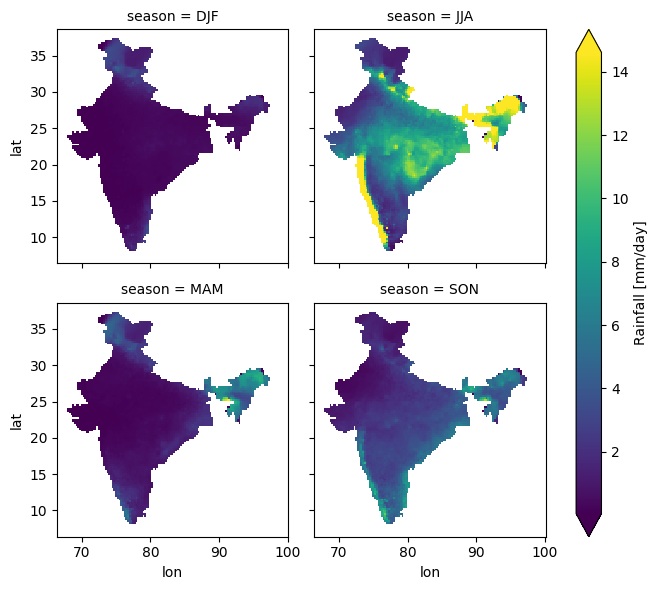

In [18]:
# Group the rainfall data by season and calculate the mean rainfall for each season
ds_seasons = ds['rain'].groupby('time.season').mean('time')

# Plot the mean seasonal rainfall using longitude (lon) for the x-axis and latitude (lat) for the y-axis
# Create separate subplots for each season with a 2-column layout
ds_seasons.plot(x='lon', y='lat', col='season', col_wrap=2, robust=True)


> 